# Final Project Capstone 
### Machine Learning Engineer Nanodegree
## Pulsars Neutron Stars  Classifier
## Student: Rafael Barreto

#### This work uses: 

##### Parts of the Codes from Udacity's Machine Learning curriculum

- Author: Udacity
- Date: 2017.10.30
- Files: finding_donors.ipynb and visuals.py
- Programming Language: Python 2.7
- Type: source code
- Available at: https://github.com/udacity/machine-learning/tree/master/projects/finding_donors

##### HTRU2 Data Set 

- Donate by: Dr Robert Lyon, University of Manchester
- Date: 2017.02.14
- Files: HTRU_2.csv
- Available at: https://archive.ics.uci.edu/ml/datasets/HTRU2

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

from sklearn.utils import shuffle

import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

## Data Exploration and Vizualization

   #### DATASET COLUMNS

FEATURES:
    1. Mean of the integrated profile.
    2. Standard deviation of the integrated profile.
    3. Excess kurtosis of the integrated profile.
    4. Skewness of the integrated profile.
    5. Mean of the DM-SNR curve.
    6. Standard deviation of the DM-SNR curve.
    7. Excess kurtosis of the DM-SNR curve.
    8. Skewness of the DM-SNR curve.
    
TARGET LABEL
    9. Class



In [2]:
full_data = pd.read_csv('HTRU_2.csv',names=['Mean_IP','SD_IP',
                           'Excess_kurtosis_IP',
                           'Skewness_IP',
                           'Mean_DM_SNR_curve',
                           'SD_DM_SNR_curve',
                           'Excess_kurtosis_DM_SNR_curve','Skewness_DM_SNR_curve','Class'])

In [3]:
# Shuffle the full dataset and reset the index
full_data = full_data.sample(frac=1).reset_index(drop=True)

In [4]:
display(full_data.head(n=15))

,Mean_IP,SD_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DM_SNR_curve,SD_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve,Class
0,96.210938,40.762201,0.646871,1.207001,2.524247,16.757075,9.159340,102.134697,0
1,104.531250,48.598633,0.569887,-0.040821,1.313545,11.079955,13.994800,260.495149,0
2,92.234375,43.496854,0.506998,0.922090,2.826087,18.613518,7.891568,72.118222,0
3,110.710938,55.365145,0.373184,-0.359802,119.317726,92.428212,-0.299913,-1.601474,0
4,125.375000,50.028429,0.298019,-0.205346,4.503344,28.771894,6.638641,44.209665,0
5,90.507812,44.586292,0.483678,0.846911,3.029264,20.047060,8.099442,73.461319,0
6,121.242188,53.872063,0.047858,-0.234716,1.975753,18.795420,10.312182,111.291583,0
7,124.398438,48.244226,0.038642,0.299209,0.831940,10.152401,17.302992,366.317418,0
8,112.093750,34.634799,0.028594,1.774599,2.015886,14.174223,10.800554,146.137830,0
9,54.414062,32.636379,3.140458,15.941786,91.653846,75.627910,0.207212,-0.940667,1


In [5]:
full_data.describe()

,Mean_IP,SD_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DM_SNR_curve,SD_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
# Total number of records
n_records = len(full_data.index)

# Number of records Positives (Class 1)
n_class_1 = len(full_data.loc[full_data['Class'] == 1])

# Number of records Negatives (Class 0)         
n_class_0 = len(full_data.loc[full_data['Class'] == 0])


# Percentage of positives class 1
percent_class_1 = 100.0*n_class_1/n_records

percent_class_0 = 100.0 - percent_class_1

# Print the results
print "Total number of records: {}".format(n_records)
print "Number of Class 1: {} ({:.2f}%)".format(n_class_1,percent_class_1)
print "Number of Class 0: {} ({:.2f}%)".format(n_class_0,percent_class_0)

Total number of records: 17898
Number of Class 1: 1639 (9.16%)
Number of Class 0: 16259 (90.84%)


In [7]:
# Split the data into features and target label
target = full_data['Class']
features_raw = full_data.drop('Class', axis = 1)

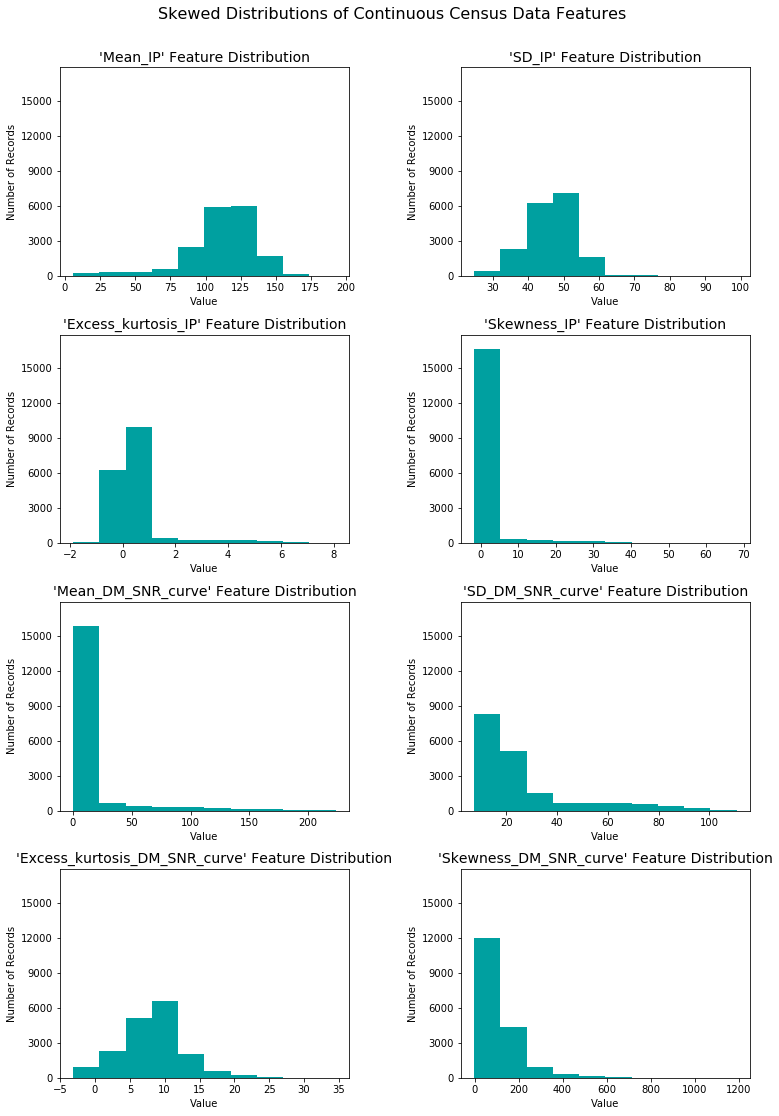

In [8]:
# Visualize skewed continuous features of original data
vs.distribution(features_raw)

## Relation of features pairs

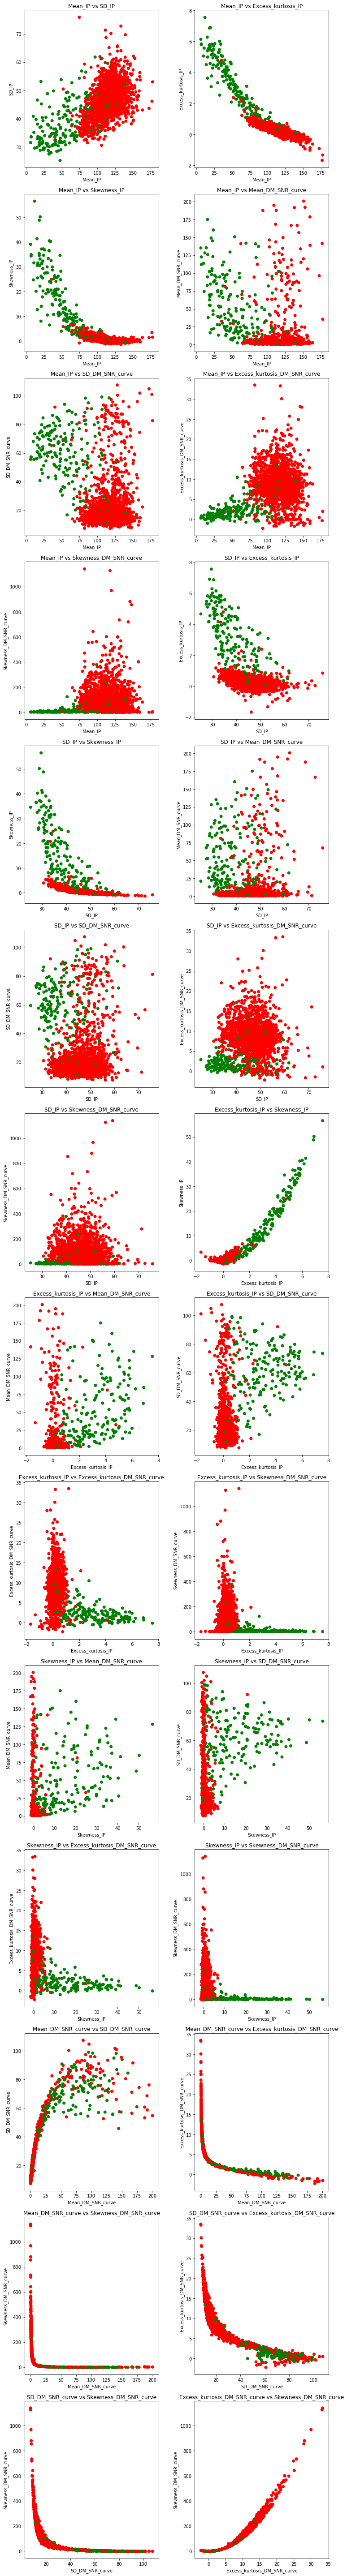

In [9]:
# Plot the relation of all possible features pairs
vs.scatterplot_features(full_data, 'Class')

### Normalizing Numerical Features

In [10]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

features = features_raw.copy()

features[list(features_raw)] = scaler.fit_transform(full_data[list(features_raw)])

# Show an example of a record with scaling applied
display(features.head(n = 8))

,Mean_IP,SD_IP,Excess_kurtosis_IP,Skewness_IP,Mean_DM_SNR_curve,SD_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve
0,0.483920,0.216063,0.253670,0.042907,0.010355,0.090893,0.326404,0.087270
1,0.528460,0.321951,0.245929,0.025053,0.004930,0.035920,0.454737,0.220014
2,0.462632,0.253015,0.239606,0.038830,0.011708,0.108869,0.292757,0.062109
3,0.561541,0.413382,0.226151,0.020490,0.533673,0.823630,0.075356,0.000315
4,0.640040,0.341271,0.218594,0.022699,0.019223,0.207234,0.259505,0.038715
5,0.453390,0.267735,0.237261,0.037755,0.012618,0.122750,0.298274,0.063235
6,0.617916,0.393207,0.193441,0.022279,0.007897,0.110630,0.357000,0.094946
7,0.634812,0.317162,0.192514,0.029918,0.002772,0.026938,0.542536,0.308719


### Split Data

In [11]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 14318 samples.
Testing set has 3580 samples.


----
## Evaluating Model Performance


### Metrics and the Naive Predictor
 - Accuracy
 - F-score
 - Naive Predictor: Always predict

In [12]:
# Calculate accuracy
accuracy = len(target[target == 1])/(1.0*len(target))

# For this model that always predicted an individual made more than $50,000
TP = len(target[target == 1])               # True Positives
FP = len(target) - len(target[target == 1]) # False Positives
FN = 0                                      # False Negatives
TN = 0                                      # True Negatives

P = TP/(1.0*(TP+FP)) # Precision
R = TP/(1.0*(TP+FN)) # Recall

# Calculate F-score using the formula above for beta = 0.5
beta = 0.5
fscore = (1 + np.power(beta,2))*(P*R)/((np.power(beta,2)*P) + R)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)



Naive Predictor: [Accuracy score: 0.0916, F-score: 0.1119]


###  Supervised Learning Models used:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Support Vector Machines (SVM)
- Random Forest

### Training and Predicting Pipeline

In [13]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score( y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Initial Model Evaluation

GaussianNB trained on 143 samples.
GaussianNB trained on 1431 samples.
GaussianNB trained on 14318 samples.
DecisionTreeClassifier trained on 143 samples.
DecisionTreeClassifier trained on 1431 samples.
DecisionTreeClassifier trained on 14318 samples.


C:\Users\rafael\Anaconda3\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 143 samples.
SVC trained on 1431 samples.
SVC trained on 14318 samples.


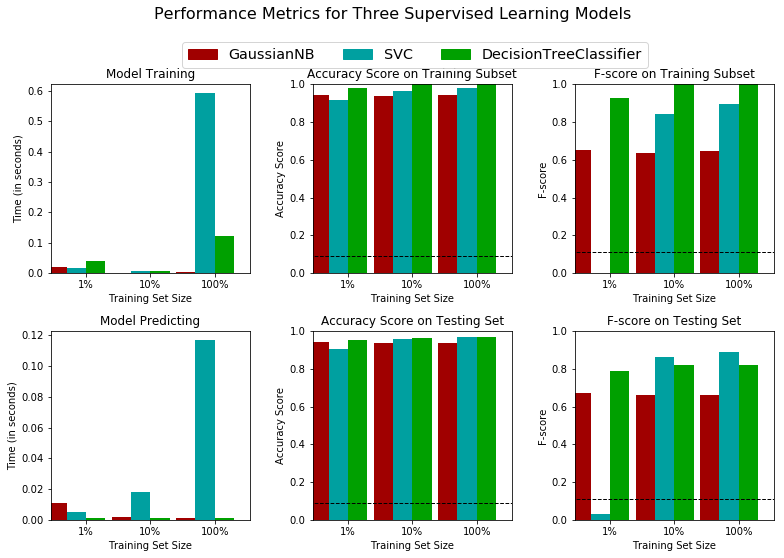

In [14]:
# Three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state = 99)
clf_C = SVC(random_state = 99)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*len(X_train))
samples_10 = int(0.1*len(X_train))
samples_100 = int(len(X_train))


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results


Best Model: SVC

### Implementation: Model Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


### SVC
# Initialize the classifier
clf = SVC(random_state = 99)

# Parameters list to tune
beta=0.5
parameters = {'C' : [1.0, 1.5, 3.0],'degree':[2,3,4]}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.9701
F-score on testing data: 0.8893

Optimized Model
------
Final accuracy score on the testing data: 0.9721
Final F-score on the testing data: 0.8964


----
## Feature Importance


### Extracting Feature Importance

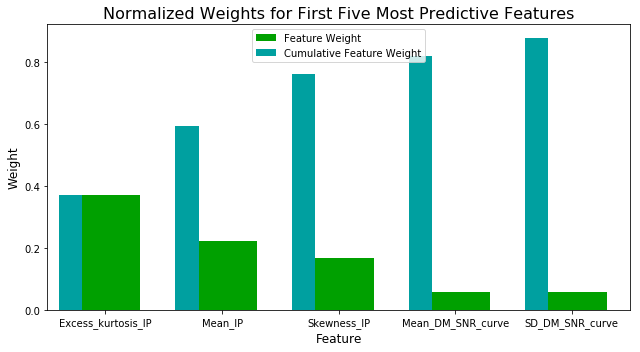

In [16]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Feature Selection

In [17]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.9721
F-score on testing data: 0.8964

Final Model trained on reduced data
------
Accuracy on testing data: 0.9732
F-score on testing data: 0.9003


----

## Final Results:



|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |    Optimized Model with Feature Selection |
| :------------: | :-----------------: | :---------------: | :-------------: |  :-------------------: |
| Accuracy Score |       0.0916        |      0.9701       |     0.9721      |         0.9732               |
| F-score        |       0.2917        |      0.8893       |     0.8964      |             0.9003          |

### Benchmark

Benchmark used: "WHY ARE PULSARS HARD TO FIND?" by Dr. James Robert Lyon, 2016. A thesis submitted to the University of Manchester for the degree of Doctor of Philosophy in the Faculty of Engineering and Physical Sciences.

Page 232, Table 8.6

Chapter 8: "New Candidate Features"

|     Metric     | Benchmark Dr. James Robert Lyon PHD Thesis |   Optimized Model with Feature Selection |
| :------------: | :-----------------: | :---------------: | 
| Accuracy Score |       0.961        |        0.9732        |
| F-score        |       0.789        |          0.9003       |